# Jupyter test
This is a test to check you have installed root and jupyter correctly.  
In fact, you might find the code here exposed in <https://nbviewer.org/url/root.cern/doc/master/notebooks/DynamicSlice.py.nbconvert.ipynb>

In [1]:
! python --version 

Python 3.11.4


In [2]:
!pip --version 

pip 23.0.1 from /Users/javigamero/MyMac/DS_Master/TFM/env/lib/python3.11/site-packages/pip (python 3.11)


In [3]:
! pip list

Package                   Version
------------------------- ---------
anyio                     3.7.1
appnope                   0.1.3
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
comm                      0.1.3
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
executing                 1.2.0
fastjsonschema            2.18.0
fonttools                 4.41.1
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.25.0
ipython                   8.14.0
ipython-genutils     

In [4]:

import sys
import ctypes
 
from ROOT import gRandom, gPad, gROOT, gVirtualX
from ROOT import kTRUE, kRed
from ROOT import TCanvas, TH2, TH2F
 
 
class DynamicExec:
 
   def __init__( self ):
      self._cX   = None
      self._cY   = None
      self._old  = None
 
   def __call__( self ):
 
      h = gPad.GetSelected();
      if not h:
         return
 
      if not isinstance( h, TH2 ):
         return
 
      gPad.GetCanvas().FeedbackMode( kTRUE )
 
    # erase old position and draw a line at current position
      px = gPad.GetEventX()
      py = gPad.GetEventY()
 
      uxmin, uxmax = gPad.GetUxmin(), gPad.GetUxmax()
      uymin, uymax = gPad.GetUymin(), gPad.GetUymax()
      pxmin, pxmax = gPad.XtoAbsPixel( uxmin ), gPad.XtoAbsPixel( uxmax )
      pymin, pymax = gPad.YtoAbsPixel( uymin ), gPad.YtoAbsPixel( uymax )
 
      if self._old != None:
         gVirtualX.DrawLine( pxmin, self._old[1], pxmax, self._old[1] )
         gVirtualX.DrawLine( self._old[0], pymin, self._old[0], pymax )
      gVirtualX.DrawLine( pxmin, py, pxmax, py )
      gVirtualX.DrawLine( px, pymin, px, pymax )
 
      self._old = px, py
 
      upx = gPad.AbsPixeltoX( px )
      x = gPad.PadtoX( upx )
      upy = gPad.AbsPixeltoY( py )
      y = gPad.PadtoY( upy )
 
      padsav = gPad
 
    # create or set the display canvases
      if not self._cX:
         self._cX = TCanvas( 'c2', 'Projection Canvas in X', 730, 10, 700, 500 )
      else:
         self._DestroyPrimitive( 'X' )
 
      if not self._cY:
         self._cY = TCanvas( 'c3', 'Projection Canvas in Y', 10, 550, 700, 500 )
      else:
         self._DestroyPrimitive( 'Y' )
 
      self.DrawSlice( h, y, 'Y' )
      self.DrawSlice( h, x, 'X' )
 
      padsav.cd()
 
   def _DestroyPrimitive( self, xy ):
      proj = getattr( self, '_c'+xy ).GetPrimitive( 'Projection '+xy )
      if proj:
         proj.IsA().Destructor( proj )
 
   def DrawSlice( self, histo, value, xy ):
      yx = xy == 'X' and 'Y' or 'X'
 
    # draw slice corresponding to mouse position
      canvas = getattr( self, '_c'+xy )
      canvas.SetGrid()
      canvas.cd()
 
      bin = getattr( histo, 'Get%saxis' % xy )().FindBin( value )
      hp = getattr( histo, 'Projection' + yx )( '', bin, bin )
      hp.SetFillColor( 38 )
      hp.SetName( 'Projection ' + xy )
      hp.SetTitle( xy + 'Projection of bin=%d' % bin )
      hp.Fit( 'gaus', 'ql' )
      hp.GetFunction( 'gaus' ).SetLineColor( kRed )
      hp.GetFunction( 'gaus' ).SetLineWidth( 6 )
      canvas.Update()
 
 
if __name__ == '__main__':
 # create a new canvas.
   c1 = TCanvas('c1', 'Dynamic Slice Example', 10, 10, 700, 500 )
   c1.SetFillColor( 42 )
   c1.SetFrameFillColor( 33 )
 
 # create a 2-d histogram, fill and draw it
   hpxpy  = TH2F( 'hpxpy', 'py vs px', 40, -4, 4, 40, -4, 4 )
   hpxpy.SetStats( 0 )
   x, y = ctypes.c_double( 0.1 ), ctypes.c_double( 0.101 )
   for i in range( 50000 ):
   # pass ctypes doubles by reference, then retrieve their modified values with .value
     gRandom.Rannor( x, y )
     hpxpy.Fill( x.value, y.value )
   hpxpy.Draw( 'COL' )
 
 # Add a TExec object to the canvas (explicit use of __main__ is for IPython)
   import __main__
   __main__.slicer = DynamicExec()
   c1.AddExec( 'dynamic', 'TPython::Exec( "slicer()" );' )
   c1.Update()

Welcome to JupyROOT 6.28/04


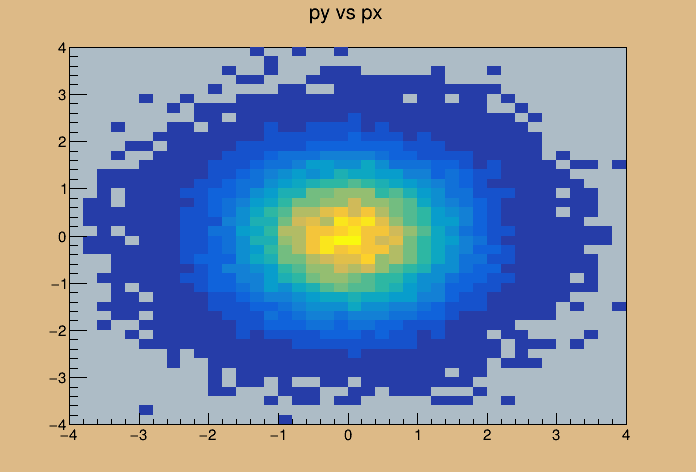

In [5]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()